In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Question

We observed that the credit amount of people with bad credibility (Risk = 1) is approximately 1,000 units above that of people with good credibility (Risk = 0). Is this statistically meaningful?

### 1. Import Dataset

In [4]:
german_dataset = pd.read_csv('../statistics/german_dataset.csv')
german_dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,1


### 2. Find Each Group's Mean

In [7]:
mean_good = german_dataset[german_dataset['Risk'] == 0]['Credit amount'].mean()
mean_bad = german_dataset[german_dataset['Risk'] == 1]['Credit amount'].mean()

print('Credit amount of Good:', mean_good)
print('Credit amount of bad:', mean_bad)

Credit amount of Good: 2985.457142857143
Credit amount of bad: 3938.1266666666666


In [8]:
#find length of each groups
print(len(german_dataset[german_dataset['Risk'] == 0]))
print(len(german_dataset[german_dataset['Risk'] == 1]))

700
300


### 3. Permutation Test

In [9]:
len_good = len(german_dataset[german_dataset['Risk'] == 0])
len_bad = len(german_dataset[german_dataset['Risk'] == 1])

len_good, len_bad

(700, 300)

In [13]:
random_generator = np.random.RandomState(42)

pm = []

total_indice = np.arange(len(german_dataset))

for i in range(1000):
    copy_indice = total_indice.copy()
    
    random_generator.shuffle(copy_indice)
    
    perm_a = german_dataset.iloc[copy_indice[:len_good]]
    perm_b = german_dataset.iloc[copy_indice[len_good:]]
    
    pm.append(perm_b['Credit amount'].mean() - perm_a['Credit amount'].mean())

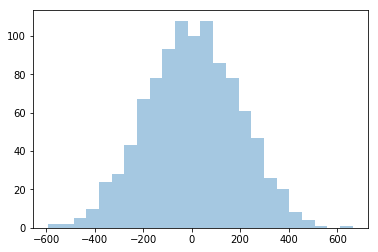

In [18]:
sns.distplot(pm, kde=False)

### 4. Conclusion

The observed difference between the two groups (approximately $1,000) seems to have a statistical significance. Looking at the graph above, it is hard to say that the observed difference occured to a mere chance